Dimension of the original dataset: (10000, 14)


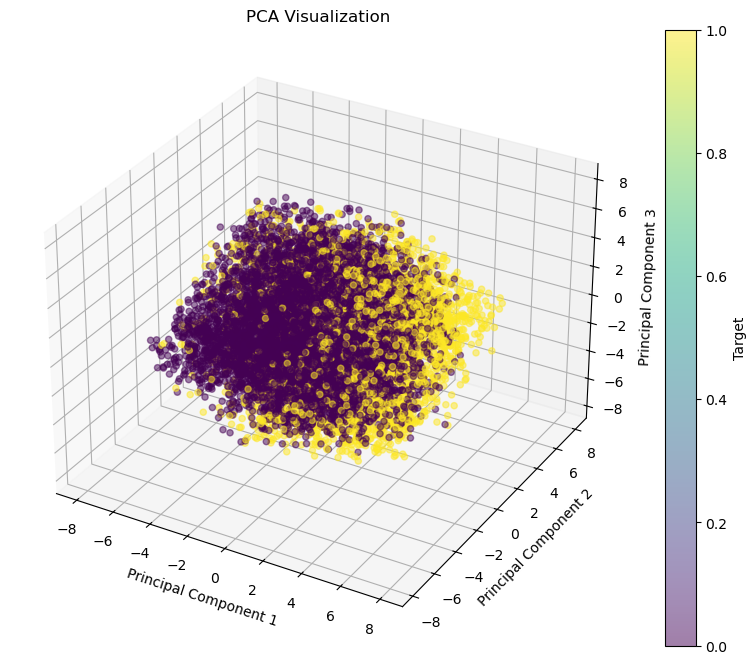

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Load the dataset
file_path = 'Task7.1.csv'
data = pd.read_csv(file_path)

# 3. Print the dimension of the dataset
print("Dimension of the original dataset:", data.shape)

# 4. Apply PCA
X = data.drop(columns=['stabf'])
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Map categorical labels to numerical values
target_mapping = {'unstable': 0, 'stable': 1}
data['target_numeric'] = data['stabf'].map(target_mapping)

# 6. Visualize the data
# Plot the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three principal components
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=data['target_numeric'], cmap='viridis', alpha=0.5)
plt.title('PCA Visualization')
plt.colorbar(scatter, label='Target')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset
file_path = 'Task7.1.csv'
data = pd.read_csv(file_path)

# 2. Data Preprocessing
# Assuming there's no missing data and the target variable is already encoded
X = data.drop(columns=['stabf'])
y = data['stabf']

# 3. Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = svm_classifier.predict(X_test)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Report Performance and Hyperparameters
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_rep)

# Report Model Hyperparameters
print("\nModel Hyperparameters:")
print(f"Kernel: {svm_classifier.kernel}")


Model Performance:
Accuracy: 0.9455

Classification Report:
              precision    recall  f1-score   support

      stable       0.92      0.92      0.92       693
    unstable       0.96      0.96      0.96      1307

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000


Model Hyperparameters:
Kernel: linear


Dimension of the original dataset: (10000, 14)


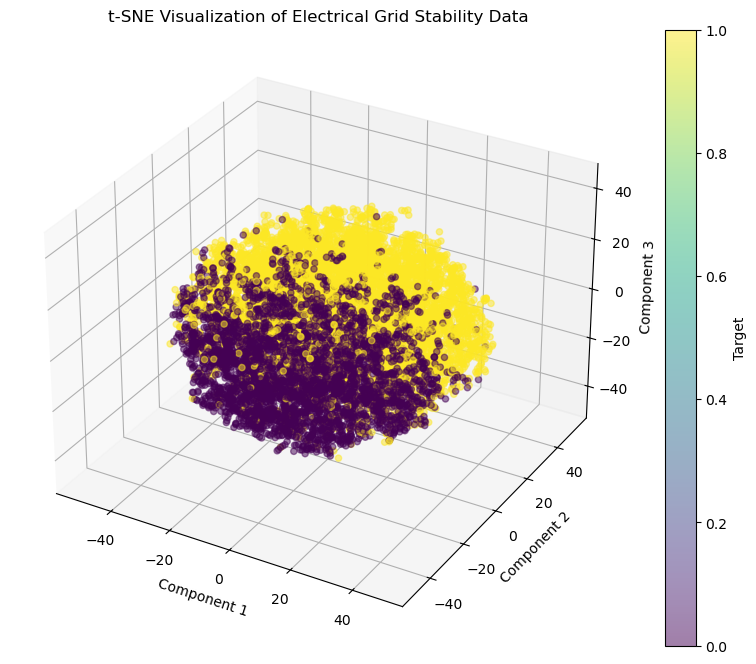

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv("Task7.1.csv")  

# Print the dimension of the dataset
print("Dimension of the original dataset:", df.shape)

# Separate features and target variable
X = df.drop(columns=["stabf"])  # Features
y = df["stabf"]  # Target variable

# Map categorical target variable to numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE to reduce dimensionality to three components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the selected components using scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three t-SNE components
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_encoded, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Electrical Grid Stability Data')
plt.colorbar(scatter, label='Target')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("Task7.1.csv")  

# Separate features and target variable
X = df.drop(columns=["stabf"])  # Features
y = df["stabf"]  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model with RBF kernel
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Report the performance and hyperparameters
print("Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("SVM Model Hyperparameters:")
print("Kernel:", svm_model.kernel)
print("C (Regularization Parameter):", svm_model.C)
print("Gamma:", svm_model.gamma)


Performance Metrics:
Accuracy: 0.9815
Precision: 0.981523548233552
Recall: 0.9815
F1 Score: 0.9815093502898933
SVM Model Hyperparameters:
Kernel: rbf
C (Regularization Parameter): 1.0
Gamma: scale


In [11]:
""" Hyper-parameter tuning involves selecting the best set of hyper-parameters for a machine learning model to optimize its performance. In Tasks 2 and 4, we used SVM models with different kernels (linear and rbf). The main hyper-parameter for SVM models is the regularization parameter C.

In Task 2, we used the default C value, and in Task 4, we also used the default C value for the SVM with rbf kernel. However, in practice, we can perform hyper-parameter tuning by using techniques like grid search or random search to find the optimal C value that maximizes the model's performance metrics.

Hyper-parameter tuning is crucial for improving the model's generalization ability and achieving better performance on unseen data. It involves selecting the right combination of hyper-parameters based on cross-validation performance or other optimization criteria."""

" Hyper-parameter tuning involves selecting the best set of hyper-parameters for a machine learning model to optimize its performance. In Tasks 2 and 4, we used SVM models with different kernels (linear and rbf). The main hyper-parameter for SVM models is the regularization parameter C.\n\nIn Task 2, we used the default C value, and in Task 4, we also used the default C value for the SVM with rbf kernel. However, in practice, we can perform hyper-parameter tuning by using techniques like grid search or random search to find the optimal C value that maximizes the model's performance metrics.\n\nHyper-parameter tuning is crucial for improving the model's generalization ability and achieving better performance on unseen data. It involves selecting the right combination of hyper-parameters based on cross-validation performance or other optimization criteria."